In [2]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from prunedcv import PrunedCV
import seaborn as sns
import numpy as np

In [3]:
data = fetch_california_housing()
x = data['data']
y = data['target']

In [4]:
model = LGBMRegressor()

In [5]:
def obejctive_standard(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 1_000)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return - np.mean(cross_val_score(model, x, y, cv=12, scoring='neg_mean_squared_error'))

study_standard = optuna.create_study()

study_standard.optimize(obejctive_standard, timeout=120)

[I 2019-03-13 20:53:07,419] Finished a trial resulted in value: 0.4000153077456145. Current best value is 0.4000153077456145 with parameters: {'n_estimators': 35, 'num_leaves': 16, 'colsample_bytree': 0.577143800983531, 'learning_rate': 0.17623081506183247, 'max_depth': 473}.
[I 2019-03-13 20:53:07,928] Finished a trial resulted in value: 1.3366198959502713. Current best value is 0.4000153077456145 with parameters: {'n_estimators': 35, 'num_leaves': 16, 'colsample_bytree': 0.577143800983531, 'learning_rate': 0.17623081506183247, 'max_depth': 473}.
[I 2019-03-13 20:53:10,316] Finished a trial resulted in value: 1.3680570703896209. Current best value is 0.4000153077456145 with parameters: {'n_estimators': 35, 'num_leaves': 16, 'colsample_bytree': 0.577143800983531, 'learning_rate': 0.17623081506183247, 'max_depth': 473}.
[I 2019-03-13 20:53:11,468] Finished a trial resulted in value: 0.38603764501187937. Current best value is 0.38603764501187937 with parameters: {'n_estimators': 55, 'num

[I 2019-03-13 20:53:50,943] Finished a trial resulted in value: 0.3822140889249293. Current best value is 0.3525757978304221 with parameters: {'n_estimators': 85, 'num_leaves': 12, 'colsample_bytree': 0.926216132529257, 'learning_rate': 0.3171618141340888, 'max_depth': 776}.
[I 2019-03-13 20:53:52,870] Finished a trial resulted in value: 0.35355567022681034. Current best value is 0.3525757978304221 with parameters: {'n_estimators': 85, 'num_leaves': 12, 'colsample_bytree': 0.926216132529257, 'learning_rate': 0.3171618141340888, 'max_depth': 776}.
[I 2019-03-13 20:53:57,459] Finished a trial resulted in value: 0.3659554428459713. Current best value is 0.3525757978304221 with parameters: {'n_estimators': 85, 'num_leaves': 12, 'colsample_bytree': 0.926216132529257, 'learning_rate': 0.3171618141340888, 'max_depth': 776}.
[I 2019-03-13 20:53:57,947] Finished a trial resulted in value: 0.8427365203523721. Current best value is 0.3525757978304221 with parameters: {'n_estimators': 85, 'num_lea

[I 2019-03-13 20:54:33,859] Finished a trial resulted in value: 0.5076385999429428. Current best value is 0.34710761915984073 with parameters: {'n_estimators': 83, 'num_leaves': 79, 'colsample_bytree': 0.9055652287892654, 'learning_rate': 0.1433496304829235, 'max_depth': 439}.
[I 2019-03-13 20:54:35,708] Finished a trial resulted in value: 0.5432125676351237. Current best value is 0.34710761915984073 with parameters: {'n_estimators': 83, 'num_leaves': 79, 'colsample_bytree': 0.9055652287892654, 'learning_rate': 0.1433496304829235, 'max_depth': 439}.
[I 2019-03-13 20:54:36,540] Finished a trial resulted in value: 1.1398090544575177. Current best value is 0.34710761915984073 with parameters: {'n_estimators': 83, 'num_leaves': 79, 'colsample_bytree': 0.9055652287892654, 'learning_rate': 0.1433496304829235, 'max_depth': 439}.
[I 2019-03-13 20:54:37,757] Finished a trial resulted in value: 0.8233406774383036. Current best value is 0.34710761915984073 with parameters: {'n_estimators': 83, 'n

For probabilistic search methods like Bayesian Optimization you should use probabilistic pruning:

In [6]:
prun = PrunedCV(12, probabilistic_prun=True)

def objective_pruned(trial):

    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 1_000)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return prun.cross_val_score(model, x, y)

study_pruned = optuna.create_study()

study_pruned.optimize(objective_pruned, timeout=120)

[I 2019-03-13 20:55:12,652] Finished a trial resulted in value: 1.3722372566563739. Current best value is 1.3722372566563739 with parameters: {'n_estimators': 10, 'num_leaves': 20, 'colsample_bytree': 0.6483391168115308, 'learning_rate': 0.0008370615809837335, 'max_depth': 134}.
[I 2019-03-13 20:55:12,752] Finished a trial resulted in value: 1.3809050028210956. Current best value is 1.3722372566563739 with parameters: {'n_estimators': 10, 'num_leaves': 20, 'colsample_bytree': 0.6483391168115308, 'learning_rate': 0.0008370615809837335, 'max_depth': 134}.
[I 2019-03-13 20:55:13,108] Finished a trial resulted in value: 0.5310406716442527. Current best value is 0.5310406716442527 with parameters: {'n_estimators': 31, 'num_leaves': 58, 'colsample_bytree': 0.7283544708095447, 'learning_rate': 0.11210913027712305, 'max_depth': 3}.
[I 2019-03-13 20:55:15,436] Finished a trial resulted in value: 0.35771592560290294. Current best value is 0.35771592560290294 with parameters: {'n_estimators': 97,

[I 2019-03-13 20:55:25,668] Finished a trial resulted in value: 0.9370578941824822. Current best value is 0.35771592560290294 with parameters: {'n_estimators': 97, 'num_leaves': 44, 'colsample_bytree': 0.6310538515064109, 'learning_rate': 0.08505373308124427, 'max_depth': 68}.
[I 2019-03-13 20:55:25,891] Finished a trial resulted in value: 1.0475643435660955. Current best value is 0.35771592560290294 with parameters: {'n_estimators': 97, 'num_leaves': 44, 'colsample_bytree': 0.6310538515064109, 'learning_rate': 0.08505373308124427, 'max_depth': 68}.
[I 2019-03-13 20:55:26,539] Finished a trial resulted in value: 0.39376894391418704. Current best value is 0.35771592560290294 with parameters: {'n_estimators': 97, 'num_leaves': 44, 'colsample_bytree': 0.6310538515064109, 'learning_rate': 0.08505373308124427, 'max_depth': 68}.
[I 2019-03-13 20:55:27,026] Finished a trial resulted in value: 0.3630079740202865. Current best value is 0.35771592560290294 with parameters: {'n_estimators': 97, '

[I 2019-03-13 20:55:38,282] Finished a trial resulted in value: 1.142873641839353. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:55:38,476] Finished a trial resulted in value: 0.4262167849419327. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:55:38,771] Finished a trial resulted in value: 0.5820314640916397. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:55:38,881] Finished a trial resulted in value: 1.1186877113003473. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leave

[I 2019-03-13 20:55:50,083] Finished a trial resulted in value: 0.6829665456529052. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:55:50,986] Finished a trial resulted in value: 0.4222123476217407. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:55:52,036] Finished a trial resulted in value: 0.3738572928133543. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:55:52,143] Finished a trial resulted in value: 0.5309365789924786. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leav

[I 2019-03-13 20:56:13,255] Finished a trial resulted in value: 0.3497118779278401. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:13,401] Finished a trial resulted in value: 0.4777541317476401. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:14,279] Finished a trial resulted in value: 0.35023409105931824. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:14,393] Finished a trial resulted in value: 0.45664819151241814. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_le

[I 2019-03-13 20:56:22,589] Finished a trial resulted in value: 0.36604894388891895. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:22,749] Finished a trial resulted in value: 0.44059216511920596. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:22,976] Finished a trial resulted in value: 0.5394743124626508. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:23,191] Finished a trial resulted in value: 0.4111479612160024. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_le

[I 2019-03-13 20:56:29,066] Finished a trial resulted in value: 0.5313134300744089. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:29,284] Finished a trial resulted in value: 1.1329213748463218. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:29,631] Finished a trial resulted in value: 0.6813572317100569. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leaves': 66, 'colsample_bytree': 0.82390485408849, 'learning_rate': 0.10274985481566598, 'max_depth': 584}.
[I 2019-03-13 20:56:29,783] Finished a trial resulted in value: 1.0859578015322215. Current best value is 0.3490936466548886 with parameters: {'n_estimators': 65, 'num_leav

[I 2019-03-13 20:56:39,810] Finished a trial resulted in value: 0.35600354757979386. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:56:40,598] Finished a trial resulted in value: 0.5641751073390242. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:56:40,874] Finished a trial resulted in value: 0.3952044934861316. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:56:41,172] Finished a trial resulted in value: 0.8597368356509562. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_

[I 2019-03-13 20:56:51,658] Finished a trial resulted in value: 0.5918493158348788. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:56:51,994] Finished a trial resulted in value: 0.5909454771888754. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:56:52,343] Finished a trial resulted in value: 1.0882287810871754. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:56:52,703] Finished a trial resulted in value: 0.3863903248282353. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_l

[I 2019-03-13 20:57:02,188] Finished a trial resulted in value: 0.3610400159092851. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:57:02,479] Finished a trial resulted in value: 0.43783367782326404. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:57:03,084] Finished a trial resulted in value: 0.3370194325507997. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_leaves': 27, 'colsample_bytree': 0.8816959192073436, 'learning_rate': 0.1526588158335217, 'max_depth': 531}.
[I 2019-03-13 20:57:03,330] Finished a trial resulted in value: 0.411730693766804. Current best value is 0.3360714885951674 with parameters: {'n_estimators': 85, 'num_l

In [7]:
df_prun = study_pruned.trials_dataframe()
df_stan = study_standard.trials_dataframe()

In [8]:
df_prun['time'] = (df_prun.datetime_start - df_prun.datetime_start.min()).astype('int') / 1_000_000_000
df_stan['time'] = (df_stan.datetime_start - df_stan.datetime_start.min()).astype('int') / 1_000_000_000

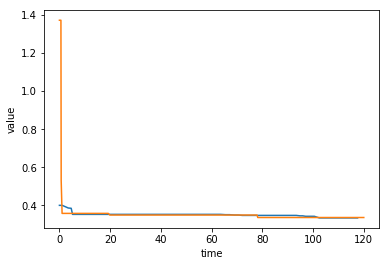

In [9]:
sns.lineplot(x=df_stan.time, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.time, y=df_prun.value.cummin());

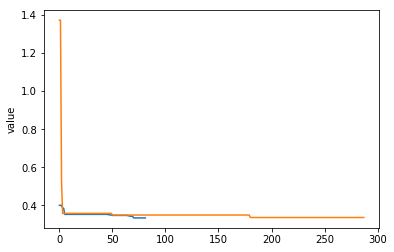

In [10]:
sns.lineplot(x=df_stan.index, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.index, y=df_prun.value.cummin());

In [11]:
df_prun.shape[0] / df_stan.shape[0]

3.5121951219512195